https://pl.wikipedia.org/wiki/Wyr%C3%B3wnanie_histogramu \
https://stackoverflow.com/questions/22159160/python-calculate-histogram-of-image

In [ ]:
import matplotlib.pyplot as plt
import tifffile as tiff
from skimage import exposure
import numpy as np

In [9]:
# Załadowanie pliku .tiff
img_a = tiff.imread("src/chest-xray.tif") 
img_b = tiff.imread("src/pollen-dark.tif") 
img_c  = tiff.imread("src/pollen-ligt.tif") 
img_d = tiff.imread("src/pollen-lowcontrast.tif") 
img_e = tiff.imread("src/pout.tif") 
img_f = tiff.imread("src/spectrum.tif") 

In [13]:
def histOfImg(img,title,index):
    if len(img.shape)==3:
        vals = np.mean(img,axis=2).astype(np.uint8)
    else:
        vals = img

    counts, bins = np.histogram(vals, range(257))

    plt.subplot(2,2,index)
    plt.imshow(img)
    plt.title(title)

    plt.subplot(2,2,index+1)
    plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
    plt.xlim([-0.5, 255.5])
    plt.title("Histogram ")

In [15]:
def hist(img):
    plt.figure(figsize=(10, 8))
    histOfImg(img_a,"Obraz orginalny",1)
    equ = exposure.equalize_hist(img)
    equ_uint8 = (equ * 255).astype(np.uint8)
    histOfImg(equ_uint8,"Obraz wyrównany",3)
    plt.tight_layout()
    plt.show()

Image: chest-xray.tif


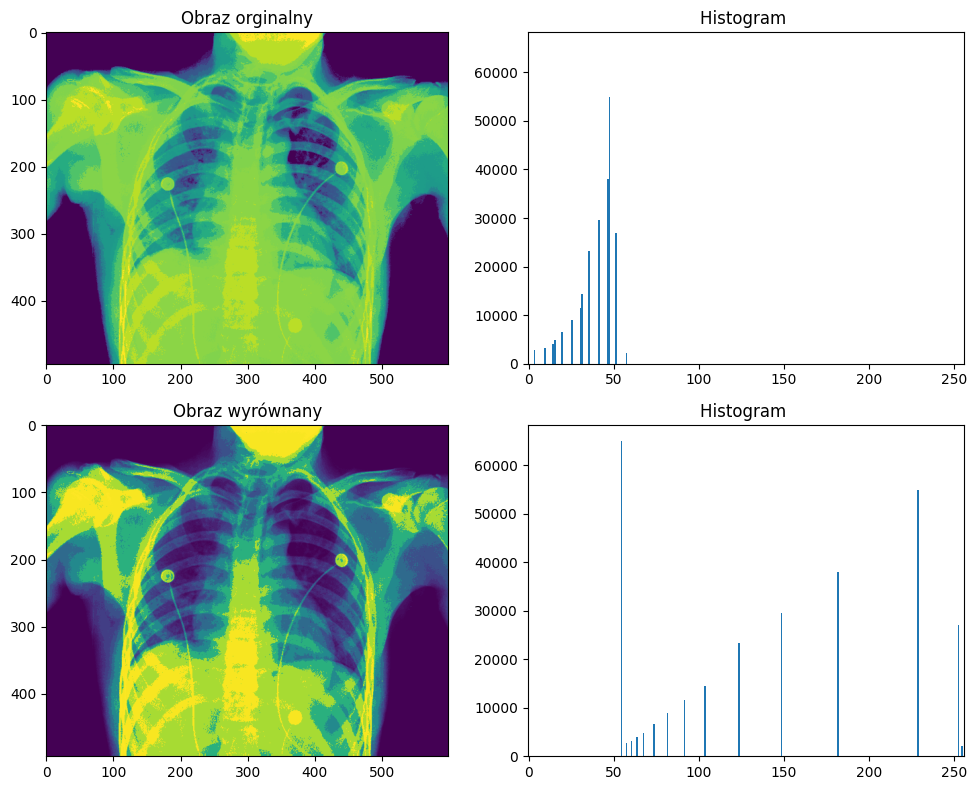

Image: pollen-dark.tif


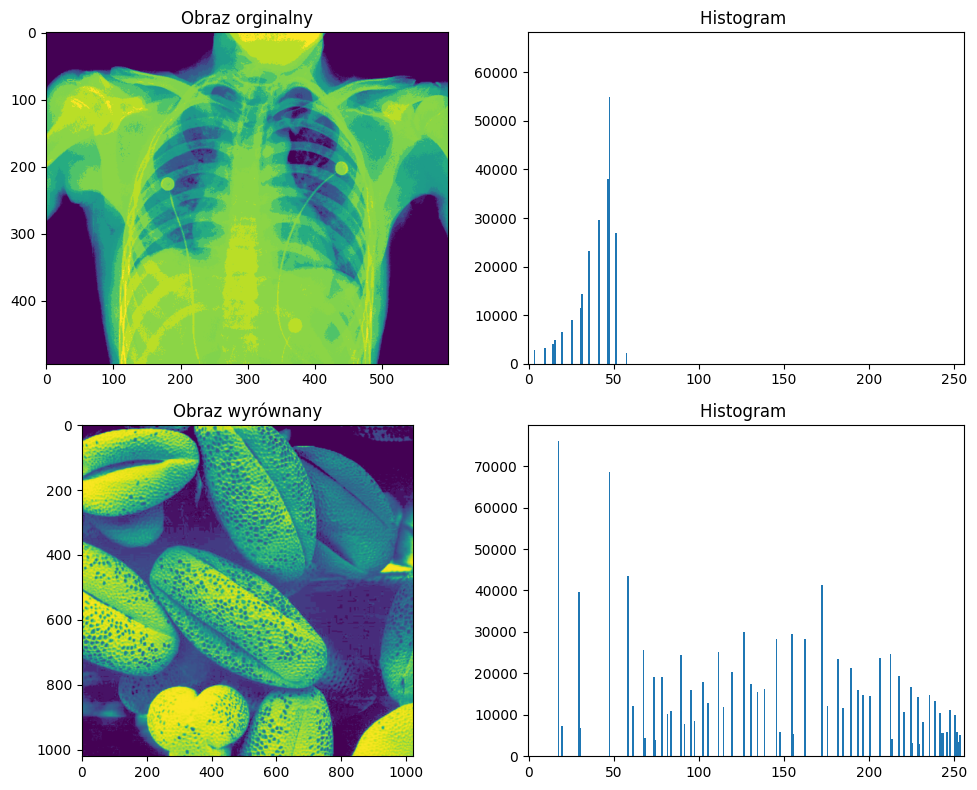

Image: pollen-ligt.tif


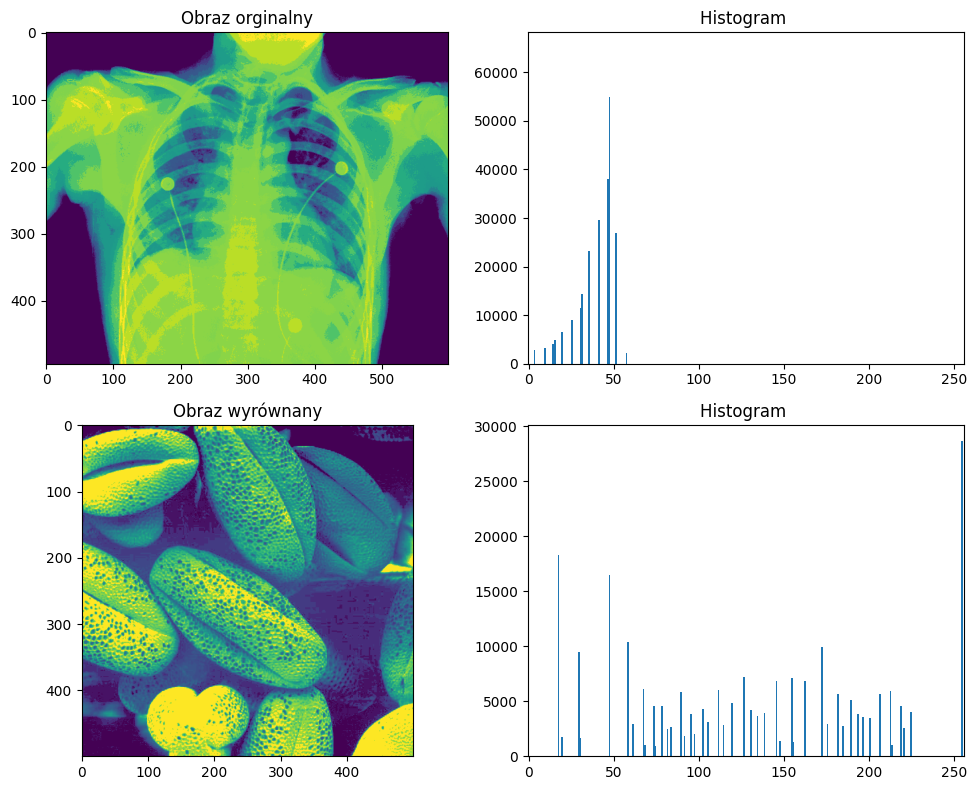

Image: pollen-lowcontrast.tif


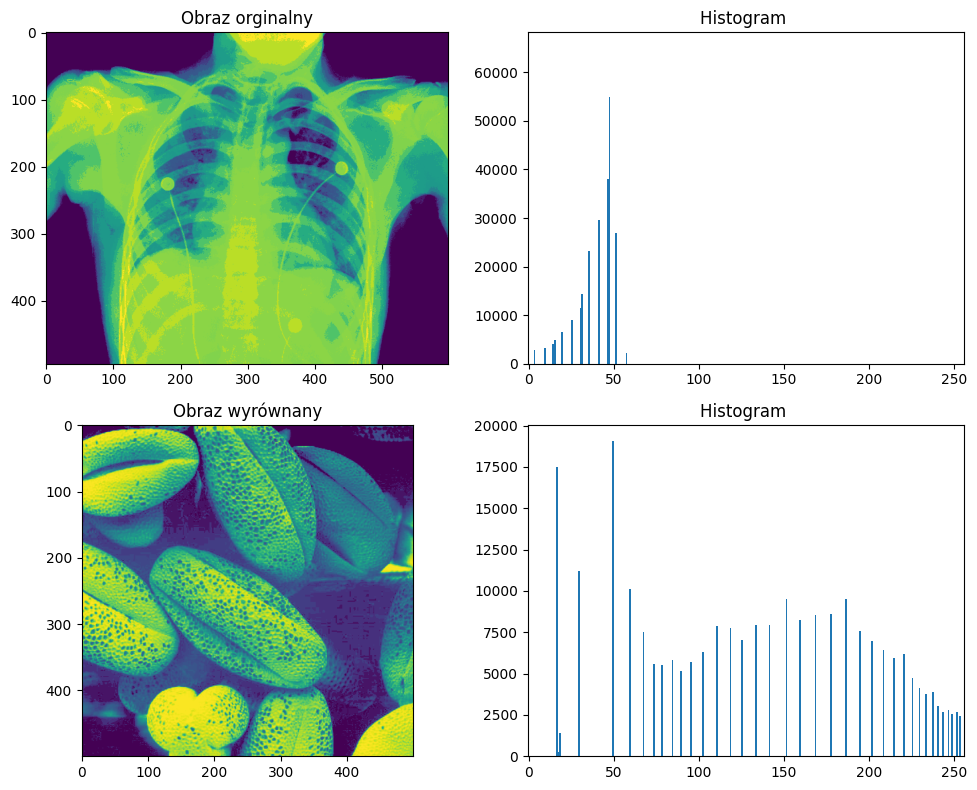

Image: chest-pout.tif


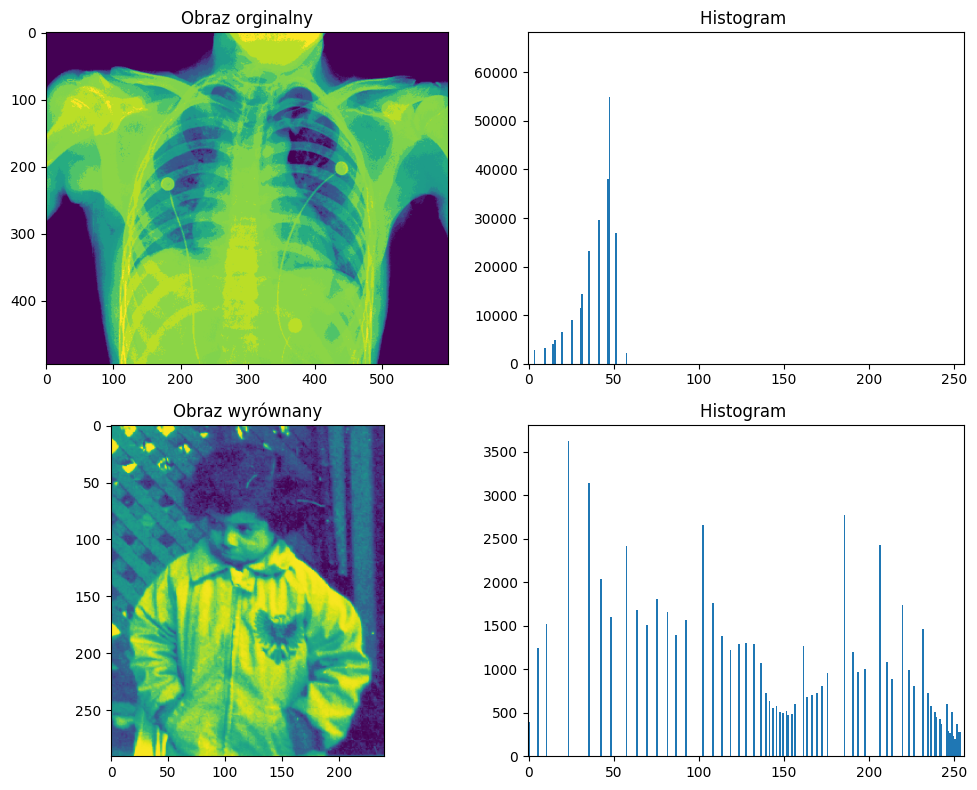

Image: chest-spectrum.tif


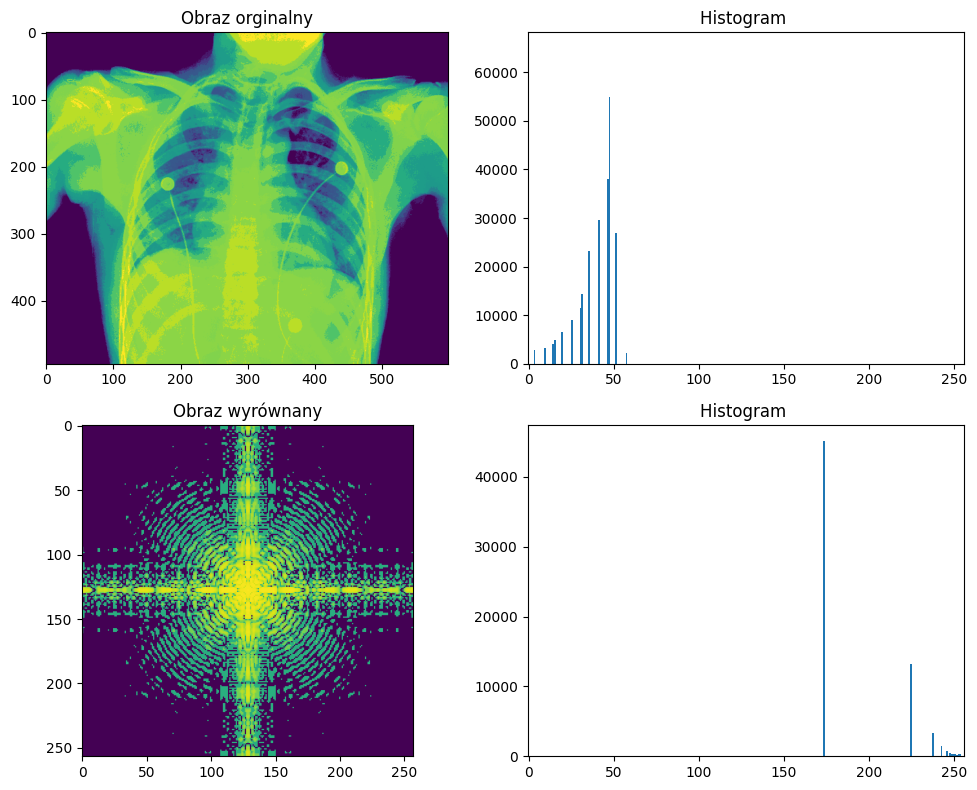

In [16]:
print("Image: chest-xray.tif")
hist(img_a)

print("Image: pollen-dark.tif")
hist(img_b)

print("Image: pollen-ligt.tif")
hist(img_c)

print("Image: pollen-lowcontrast.tif")
hist(img_d)

print("Image: chest-pout.tif")
hist(img_e)

print("Image: chest-spectrum.tif")
hist(img_f)